In [55]:
import torch
import torchvision
model = torchvision.models.optical_flow.raft_large(pretrained=True)

/home/wg25r/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/wg25r/.local/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Raft_Large_Weights.C_T_SKHT_V2`. You can also use `weights=Raft_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/raft_large_C_T_SKHT_V2-ff5fadd5.pth" to /home/wg25r/.cache/torch/hub/checkpoints/raft_large_C_T_SKHT_V2-ff5fadd5.pth
100%|██████████| 20.1M/20.1M [00:00<00:00, 80.2MB/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0..1.0].


tensor(0.0739, device='cuda:0', grad_fn=<MaxBackward1>)


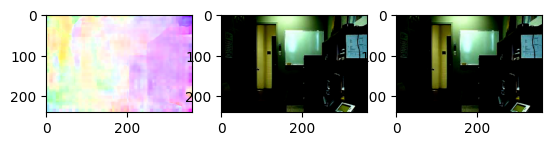

In [58]:
import os
import cv2
import numpy as np
import torchvision.transforms as transforms
from torchvision.utils import flow_to_image
import pylab 
idx = 120
frames = sorted(os.listdir("/mnt/fastdata/dataset/baseline/office/input"))
frame1 = cv2.imread("/mnt/fastdata/dataset/baseline/office/input/" + frames[idx])
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame2 = cv2.imread("/mnt/fastdata/dataset/baseline/office/input/" + frames[idx + 1])
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)

transform = torchvision.transforms.Compose([
    transforms.ToPILImage(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
])
frame1 = transform(frame1).unsqueeze(0)
frame2 = transform(frame2).unsqueeze(0)
model = model.eval().cuda()
flow = model(frame1.cuda(), frame2.cuda())[-1]
img = flow_to_image(flow[0].detach().cpu())
pylab.subplot(1, 3, 1)
pylab.imshow(img.permute(1, 2, 0), vmin=0, vmax=1)
pylab.subplot(1, 3, 2)
pylab.imshow(frame1[0].permute(1, 2, 0))
pylab.subplot(1, 3, 3)
pylab.imshow(frame2[0].permute(1, 2, 0))
print(flow.max())